In [ ]:
####################################### Github Link##################################################
# https://github.com/nicole9997dbl/Python-Project_Batting/blob/master/Zhang_Yu_HW2.ipynb #

In [ ]:
#Q1 import package&data

In [ ]:
import numpy as np
import pandas as pd
data = pd.read_csv('C:/Users/nicol/Documents/6340#Python/Week#4/Batting.csv')

In [ ]:
#Q2 dimensions of data

In [64]:
data.columns

Index(['playerID', 'nameFirst', 'nameLast', 'birthYear', 'yearID', 'stint',
       'teamID', 'lgID', 'G', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'SB',
       'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH', 'SF', 'GIDP', 'PA', 'age'],
      dtype='object')

In [3]:
#Q3 How many players have hit 40 or more HRs in one single season? (Number only)

In [7]:
player_year = data.groupby(['playerID','nameFirst','nameLast','yearID']).sum()
HR_40_1season = player_year[player_year.HR>=40].reset_index()
HR_40_1season['playerID'].nunique()

142

In [8]:
#Q4 How many players have hit 600 or more HRs for their career? 

In [9]:
player = data.groupby(['playerID','nameFirst','nameLast']).sum()
HR_600_career = player[player.HR>=600].reset_index()
HR_600_career[['nameFirst','nameLast','HR']]

,nameFirst,nameLast,HR
0,Hank,Aaron,755
1,Barry,Bonds,762
2,Ken,Griffey,630
3,Willie,Mays,660
4,Alex,Rodriguez,696
5,Babe,Ruth,714
6,Sammy,Sosa,609
7,Jim,Thome,612


In [10]:
#Q5 How many unique players have hit 40 2Bs or more, 10 3Bs or more, 200 Hits or more, and 30 HRs or more in one season? 

In [11]:
player_year
filter5 = player_year[player_year['2B']>=40][player_year['3B']>=10][player_year['H']>=200][player_year['HR']>=30]
filter5.reset_index(inplace=True)
filter5['playerID'].nunique()

C:\Users\nicol\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


11

In [12]:
#Q6 How many players seasons have had 100 or more SBs?
# Dataframe, first name, last name, yearID, number of SBs, ordered from descending SBs

In [14]:
SB100_1season = player_year[player_year.SB>= 100].reset_index()
SB100_1season[['nameFirst','nameLast','yearID','SB']].sort_values('SB',ascending=False).reset_index(drop=True)

,nameFirst,nameLast,yearID,SB
0,Hugh,Nicol,1887,138.0
1,Rickey,Henderson,1982,130.0
2,Arlie,Latham,1887,129.0
3,Lou,Brock,1974,118.0
4,Charlie,Comiskey,1887,117.0
5,Billy,Hamilton,1889,111.0
6,John,Ward,1887,111.0
7,Billy,Hamilton,1891,111.0
8,Vince,Coleman,1985,110.0
9,Vince,Coleman,1987,109.0


In [15]:
#Q7 How many players in the 1960s (yearID) have hit 200 or more HRs? #
#(Dataframe, first name, last name, number of HRs, ordered descending by HR amt)#

In [88]:
data1960s = data[data.yearID>1959][data.yearID<1970]
player_1960s = data1960s.groupby(['playerID','nameFirst','nameLast']).sum()
filter7 = player_1960s[player_1960s.HR>=200].reset_index()
filter7[['nameFirst','nameLast','HR']].sort_values('HR',ascending=False).reset_index(drop=True)

C:\Users\nicol\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,nameFirst,nameLast,HR
0,Harmon,Killebrew,393
1,Hank,Aaron,375
2,Willie,Mays,350
3,Frank,Robinson,316
4,Willie,McCovey,300
5,Frank,Howard,288
6,Norm,Cash,278
7,Ernie,Banks,269
8,Mickey,Mantle,256
9,Orlando,Cepeda,254


In [16]:
#Q8 Who has hit the most HRs in history? (Dataframe, first name, last name, HRs)#

In [17]:
HR_by_player = data.groupby(['playerID','nameFirst','nameLast']).sum()['HR'].reset_index()
HR_King = HR_by_player.sort_values('HR',ascending=False).head(1)
HR_King.reset_index()[['nameFirst','nameLast','HR']]

,nameFirst,nameLast,HR
0,Barry,Bonds,762


In [ ]:
#Q9 Who had the most hits (H) in the 1970s? (Dataframe)#

In [14]:
data1970s = data[data.yearID>1969][data.yearID<1980]
player_1970s = data1970s.groupby(['playerID','nameFirst','nameLast']).sum()
Hits_King_1970s = player_1970s.sort_values('H',ascending=False).reset _index().head(1)
Hits_King_1970s[['nameFirst','nameLast','H']]

C:\Users\nicol\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,nameFirst,nameLast,H
0,Pete,Rose,2045


In [ ]:
#Q10 Top 5 highest OBP (on base percentage) with at least 500 PAs in 1977? #
#(Dataframe, first name, last name, OBP, ordered descending by OBP)#

In [18]:
data_1977 = data[data.yearID == 1977]
player_1977 = data_1977.groupby(['playerID','nameFirst','nameLast']).sum()
player_1977['PA'] = player_1977.AB+player_1977.BB+player_1977.HBP+player_1977.SH+player.SF
player_1977['OBP'] = (player_1977.H+player_1977.IBB+player_1977.HBP)*1.000/(player_1977.AB+player_1977.IBB+player_1977.HBP+player_1977.SF)
PA500_1977 = player_1977[player_1977.PA >= 500]
PA500_1977.sort_values('OBP',ascending=False).reset_index()[['nameFirst','nameLast','OBP']].head(5)

,nameFirst,nameLast,OBP
0,Rod,Carew,0.402191
1,Dave,Parker,0.355522
2,Ted,Simmons,0.349177
3,Lyman,Bostock,0.343137
4,Ken,Singleton,0.342908


In [ ]:
#Q11 Top 8 highest averages in 2013 with at least 300 PAs? (Dataframe, first name, last name, average, descending by average)#

In [19]:
data['PA']= data.AB+data.BB+data.HBP+data.SH+data.SF
data_2013 = data[data.yearID==2013]
player_2013 = data_2013.groupby(['playerID','nameFirst','nameLast']).sum().reset_index()
PA300_2013 = player_2013[player_2013.PA>=300]
PA300_2013['BA']= PA300_2013.H*1.000/PA300_2013.AB
PA300_2013.sort_values('BA',ascending=False).head(8)[['nameFirst','nameLast','BA']].reset_index(drop=True)

C:\Users\nicol\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,nameFirst,nameLast,BA
0,Miguel,Cabrera,0.347748
1,Hanley,Ramirez,0.345395
2,Michael,Cuddyer,0.331288
3,Joe,Mauer,0.323596
4,Mike,Trout,0.322581
5,Chris,Johnson,0.321012
6,Freddie,Freeman,0.319419
7,Yasiel,Puig,0.319372


In [20]:
#Q12 Leaders in hits from 1940 up to and including 1949. (Dataframe, first name, last name, number of hits)top5#

In [21]:
data_1940s = data[data.yearID<1950][data.yearID>1939]
player_1940s = data_1940s.groupby(['playerID','nameFirst','nameLast']).sum()
Hits_Kings_1940s = player_1940s.sort_values('H',ascending=False).head(5).reset_index()
Hits_Kings_1940s[['nameFirst','nameLast','H']]

C:\Users\nicol\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,nameFirst,nameLast,H
0,Lou,Boudreau,1578
1,Bob,Elliott,1563
2,Dixie,Walker,1512
3,Stan,Musial,1432
4,Bobby,Doerr,1407


In [22]:
#Q13 Who led MLB with the most hits the most times each year?  And how many times?  (Dataframe, Number of hits)#

In [69]:
by_year_player = data.groupby(['yearID','playerID','nameFirst','nameLast'])
Hits_year_player = pd.DataFrame(by_year_player.sum()['H']).reset_index()
leader_inHits = Hits_year_player.groupby('yearID').max()
leader_inHits_times =leader_inHits.groupby(['playerID','nameFirst','nameLast'])['H'].count().reset_index()
leader_inHits_times.sort_values('H',ascending=False).head(1)

,playerID,nameFirst,nameLast,H
19,zimmech01,Yank,Zimmer,7


,playerID,nameFirst,nameLast,H
19,zimmech01,Yank,Zimmer,7


In [24]:
#Q14 Which players have played the most games for their careers?  
#Top 5 first name, last name, descending by games played presented as a dataframe

In [25]:
by_player = data.groupby(['playerID','nameFirst','nameLast'])
player_G = by_player.sum()['G']
player_G.reset_index().sort_values('G',ascending=False).head(5).reset_index(drop=True)[['nameFirst','nameLast','G']]

,nameFirst,nameLast,G
0,Pete,Rose,3562
1,Carl,Yastrzemski,3308
2,Hank,Aaron,3298
3,Rickey,Henderson,3081
4,Ty,Cobb,3035


In [ ]:
#Q15 How many players have had more 3000 or more hits for their careers while also hitting 500 or more HRs? 
#Just a number is okay here

In [28]:
player = data.groupby(['playerID','nameFirst','nameLast']).sum()
player_3000Hit_500HR = player[player.H>=3000][player.HR>=500].reset_index()
player_3000Hit_500HR['playerID'].nunique()

C:\Users\nicol\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


5

In [ ]:
#Q16 How many HRs were hit during the entire 1988 season?  Just a number is okay here

In [146]:
data_1988 = data[data.yearID==1988]
data_1988['HR'].sum()

3180

In [ ]:
#Q17 Please filter out and show me the top 3 average seasons by Wade Boggs during his career in seasons in which 
#    he had at least 500 or more ABs.  
#Dataframe, first name, last name, average, descending by average

In [29]:
Wade_Boggs = data[data.nameLast=='Boggs'][data.nameFirst=='Wade']
Wade_Boggs['playerID'].nunique()==1
Wade_Boggs_byseason = Wade_Boggs.groupby('yearID').sum()
Wade_Boggs_AB500 = Wade_Boggs_byseason[Wade_Boggs_byseason.AB>=500]
Wade_Boggs_AB500['BA']= Wade_Boggs_AB500.H*1.0/Wade_Boggs_AB500.AB
TOP3BA_season = Wade_Boggs_AB500.sort_values('BA',ascending=False).head(3)
TOP3BA_season['nameFirst']='Wade Wade Wade'.split()
TOP3BA_season['nameLast']='Boggs Boggs Boggs'.split()
TOP3BA_season[['nameFirst','nameLast','BA']]

C:\Users\nicol\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\nicol\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,nameFirst,nameLast,BA
yearID,,,
1985,Wade,Boggs,0.367534
1988,Wade,Boggs,0.366438
1987,Wade,Boggs,0.362976


In [ ]:
#Q18 Please filter out the top 10 OBPs for the 1995 season with 400 or more PAs, sorted by OBP descending.
#Dataframe with first name, last name, OBP

In [30]:
data_1995=data[data.yearID==1995]
player_1995=data_1995.groupby(['playerID','nameFirst','nameLast']).sum().reset_index()
PA400_1995 = player_1995[player_1995.PA>=400]
PA400_1995['OBP']=(PA400_1995.H+PA400_1995.IBB+PA400_1995.HBP)*1.000/(PA400_1995.AB+PA400_1995.IBB+PA400_1995.HBP+PA400_1995.SF)
PA400_1995.sort_values('OBP',ascending=False).head(10).reset_index(drop=True)[['nameFirst','nameLast','OBP']]

C:\Users\nicol\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,nameFirst,nameLast,OBP
0,Edgar,Martinez,0.385609
1,Tony,Gwynn,0.376812
2,Mike,Piazza,0.360987
3,Chuck,Knoblauch,0.346570
4,Frank,Thomas,0.346296
5,Dante,Bichette,0.346218
6,Derek,Bell,0.344017
7,Bobby,Bonilla,0.340351
8,Larry,Walker,0.338403
9,Tim,Salmon,0.336976


In [ ]:
#Q19 Who(One person) had the most 3Bs (in total) in 1922, 1925, 1926, and 1928 seperately?
#I would like a dataframe with first name, last name, number of 3Bs

In [31]:
selectedyear = data[data.yearID.isin([1922,1925,1926,1928])]
player_selectedyear = selectedyear.groupby(['yearID','playerID','nameFirst','nameLast']).sum().reset_index()
King_3B_1922 = player_selectedyear[player_selectedyear.yearID==1922].sort_values('3B',ascending=False).head(1)
King_3B_1925 = player_selectedyear[player_selectedyear.yearID==1925].sort_values('3B',ascending=False).head(1)
King_3B_1926 = player_selectedyear[player_selectedyear.yearID==1926].sort_values('3B',ascending=False).head(1)
King_3B_1928 = player_selectedyear[player_selectedyear.yearID==1928].sort_values('3B',ascending=False).head(1)
Kings_3B_selectedyear = pd.concat([King_3B_1922,King_3B_1925,King_3B_1926,King_3B_1928])
Kings_3B_selectedyear.set_index('yearID')[['nameFirst','nameLast','3B']]

,nameFirst,nameLast,3B
yearID,,,
1922,Jake,Daubert,22
1925,Kiki,Cuyler,26
1926,Paul,Waner,22
1928,Earle,Combs,21


In [ ]:
#Q20 How many unique players have hit 30 or more HRs in a season while also stealing (SB) 30 more or bases?
#A number is okay here

In [33]:
player_year
HR30_SB30_year = player_year[player_year.HR>=30][player_year.SB>=30].reset_index()
HR30_SB30_year['playerID'].nunique()

C:\Users\nicol\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


38

In [ ]:
#Q21 Who had the highest OBP in 1986 with 400 or more ABs? (Dataframe first name, last name, OBP)#

In [35]:
data_1986 = data[data.yearID==1986]
player_1986 = data_1986.groupby(['playerID','nameFirst','nameLast']).sum()
player_1986_AB400 = player_1986[player_1986.AB>=400]
player_1986_AB400['OBP']= (player_1986_AB400.H+player_1986_AB400.IBB+player_1986_AB400.HBP)*1.000/(
    player_1986_AB400.AB+player_1986_AB400.IBB+player_1986_AB400.HBP+player_1986_AB400.SF)
player_1986_AB400.sort_values('OBP',ascending=False).head(1).reset_index()[['nameFirst','nameLast','OBP']]

C:\Users\nicol\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,nameFirst,nameLast,OBP
0,Wade,Boggs,0.369565


In [ ]:
#Q22 Same question but for 1997 and only in the NL (check league ID)? (Dataframe, first name, last name OBP)#

In [48]:
NLdata_1997 = data[data.yearID==1997][data.lgID=='NL']
NLplayer_1997 = NLdata_1997.groupby(['playerID','nameFirst','nameLast']).sum().reset_index()
NLplayer_1997['OBP']= (NLplayer_1997.H+NLplayer_1997.IBB+NLplayer_1997.HBP)*1.0/(
    NLplayer_1997.AB+NLplayer_1997.IBB+NLplayer_1997.HBP+NLplayer_1997.SF)
NLplayer_1997_400AB = NLplayer_1997[NLplayer_1997.AB>=400]
NLplayer_1997_400AB.sort_values('OBP',ascending=False).head(1).reset_index()[['nameFirst','nameLast','OBP']]


C:\Users\nicol\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,nameFirst,nameLast,OBP
0,Larry,Walker,0.393333


In [ ]:
#Q23 Who had more than the league average HRs (for players with 500 or more ABs) in 2012 
#(filter out all players with less 500 ABs)?#
#(Dataframe first name, last name, HR descending) leagueID doesn’t matter 1.cut players less that 500 abs #

In [60]:
data_2012=data[data.yearID==2012]
player2012 = data_2012.groupby(['lgID', 'playerID', 'nameFirst', 'nameLast']).sum()
player2012['HR_lgMean'] =  player2012.groupby('lgID').transform('mean')['HR']
player2012[(player2012.HR > player2012.HR_lgMean) & (player2012.AB >= 500)].reset_index(
)[['nameFirst', 'nameLast','HR']].sort_values('HR', ascending = False).reset_index(drop=True)

,nameFirst,nameLast,HR
0,Miguel,Cabrera,44
1,Curtis,Granderson,43
2,Josh,Hamilton,43
3,Edwin,Encarnacion,42
4,Ryan,Braun,41
5,Adam,Dunn,41
6,Adrian,Beltre,36
7,Josh,Willingham,35
8,Jay,Bruce,34
9,Adam,LaRoche,33


In [ ]:
#Q24 Who is the youngest player to hit 50 or more HRs in a single season? (Dataframe, first name, last name, HRs, season)#

In [57]:
# add age column to the data
data['age'] = data['yearID']-data['birthYear']
# find players who hit 50 or more HR in a season
by_year_player = data.groupby(['yearID','playerID','nameFirst','nameLast'])
HR_by_year_player = by_year_player.sum()['HR'].reset_index()
HR50_by_year_player = HR_by_year_player[HR_by_year_player.HR >= 50].reset_index(drop=True)
# create a dataframe with age info
age_data = data[['yearID','playerID','nameFirst','nameLast','age']]
# merge age data and HR50 data
HR50_age = pd.merge(HR50_by_year_player,age_data,on=['yearID','playerID','nameFirst','nameLast'])
# find the youngest player
HR50_age.sort_values('age',ascending=True).head(1).reset_index(drop=True)[['nameFirst','nameLast','HR','yearID']]

,nameFirst,nameLast,HR,yearID
0,Prince,Fielder,50,2007


In [ ]:
#Q25 Who are the five youngest players to hit 300 or more HRs for their career? 
#(Dataframe, first name, last name, season they eclipsed more than 300 HRs)#

In [62]:
# years of each player with 300 or more HRs
annualdata = data.groupby(['playerID','nameFirst','nameLast','yearID']).sum()
annualdata_Cum = annualdata.groupby(level='yearID').cumsum().reset_index()
HR300_reached = annualdata_Cum[annualdata_Cum.HR>=300].reset_index(drop=True)[['playerID','nameFirst','nameLast','yearID','HR']]
# data with players' IDs,names,yearID and age
data['age'] = data['yearID']-data['birthYear']
player_age_data = data[['playerID','yearID','age']]
# merge to get age
HR300_reached_age = pd.merge(HR300_reached,player_age_data,on=['playerID','yearID'])
HR300_reached_age.sort_values('age').head(5).reset_index(drop=True)[['nameFirst','nameLast','yearID']]

,nameFirst,nameLast,yearID
0,Carl,Scheib,1943
1,Joe,Nuxhall,1944
2,Joe,Stanley,1897
3,Lefty,Weinert,1919
4,Carl,Scheib,1944


In [ ]:
#BONUS: Graph total HRs per season using bar graph#

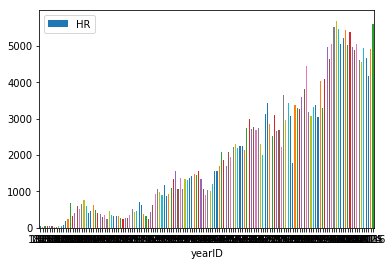

In [46]:
HRbySeason = data.groupby('yearID').sum().reset_index()[['yearID','HR']]
HRbySeason.plot.bar(x='yearID', y='HR',rot=0)

In [44]:
#BONUS:  Using a line graph please graph the average HRs per AB (think about this) per season#

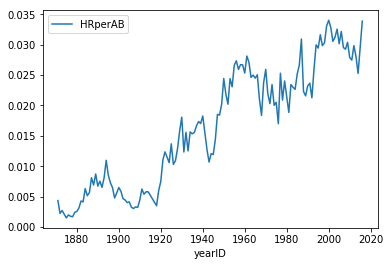

In [45]:
AB_HR_Season = data.groupby('yearID').sum()[['HR','AB']]
AB_HR_Season['HRperAB'] = AB_HR_Season.HR/AB_HR_Season.AB
AB_HR_Season = AB_HR_Season.reset_index()
AB_HR_Season.plot.line(x='yearID',y='HRperAB')